# Your name: Vania Revelina
## Assignment Name: CA01 - Data Cleaning and Exploration of India Air Quality

# Program Inititialization Section
## Enter your import packages here

In [1]:
# import packages 
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

# Data File Reading Section
## Write code to read in data from external sources here

In [2]:
#read datasets
data = pd.read_csv("data.csv",low_memory=False)
#look at the first 5 records
data.head()

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,2/1/90
1,151,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,2/1/90
2,152,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,2/1/90
3,150,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,3/1/90
4,151,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,3/1/90


# Initial Data Investigation Section

## Summarized details
### Generate descriptive statistics that summarize the central tendency, dispersion, and shape of a dataset’s distribution, excluding NaN values.
#### Steps:
#### 1. Statistical Description of data (data.describe)
#### 2. Display number of total rows and columns of the dataset (data.shape)
#### 3. Display number of non-null values for each column (data.count)
#### 4. Display number of null values for each column (sum of data.isnull)
#### 5. Display range, column, number of non-null objects of each column, datatype and memory usage (data.info)
#### 6. Display Top 10 and Bottom 10 records (head and tail)

In [3]:
# Your code for this section here ...

# The following 2 lines of codes activates an interactive shell so that each line of code following these would run one by one
# The purpose of this is to make the output easier for the user/evaluator to see
# i.e instead of running 6 lines of code in 6 different cells or running the codes with the print function where dataframe outputs do not have borders
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# 1. Statistical description of data
print("Statistical description of data\n")
data.describe()

# 2. Total number of rows and columns
print("Total number of rows and columns")
data.shape

# 3. Number of non-null values for each column
print("Number of non-null values for each column")
data.count()

# 4. Number of null values for each column
print("Number of null values for each column")
data.isnull().sum()

# 5. Range, column, number of non-null objects of each column, datatype and memory usage
print("Range, column, number of non-null objects of each column, datatype and memory usage")
data.info()

# 6. Top 10 and Bottom 10 records
print("Top 10 records")
data.head(10)

print("Bottom 10 records")
data.tail(10)

# The following will deactivate the first 2 lines of code in this cell
InteractiveShell.ast_node_interactivity = "last"

Statistical description of data

Total number of rows and columns
Number of non-null values for each column
Number of null values for each column
Range, column, number of non-null objects of each column, datatype and memory usage
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435742 entries, 0 to 435741
Data columns (total 13 columns):
stn_code                       291665 non-null object
sampling_date                  435739 non-null object
state                          435742 non-null object
location                       435739 non-null object
agency                         286261 non-null object
type                           430349 non-null object
so2                            401096 non-null float64
no2                            419509 non-null float64
rspm                           395520 non-null float64
spm                            198355 non-null float64
location_monitoring_station    408251 non-null object
pm2_5                          9314 non-null float64
date    

## Cleansing the dataset
### Dropping of less valued columns:
1. stn_code, agency, sampling_date, location_monitoring_agency do not add much value to the dataset in terms of information. Therefore, we can drop those columns.

2. Dropping rows where no date is available.

In [4]:
# Cleaning up the data

# dropping columns that aren't required
# drop() method allows us to drop the columns that aren't required
# the first argument is a list specifying the names of columns we want to drop
# the second argument tells us if the first argument are indices of rows or headers of columns (0=row, 1=column)
# the third argument specifies if we want the modified dataframe to be put in place of the original dataframe
data.drop(["stn_code","agency","sampling_date","location_monitoring_station"],axis=1,inplace=True)


# dropping rows where no date is available

# dropna() method allows us to drop N/A values from a specific column (specified in the "subset" argument)
data.dropna(subset=["date"],inplace=True)

In [5]:
# displaying final columns (data.columns)
# the following line will output all the column headers in dataframe "data"
data.columns

Index(['state', 'location', 'type', 'so2', 'no2', 'rspm', 'spm', 'pm2_5',
       'date'],
      dtype='object')

### Changing the types to uniform format:

Notice that the ‘type’ column has values such as ‘Industrial Area’ and ‘Industrial Areas’ — both actually mean the same, so let’s remove such type of stuff and make it uniform. Replace the 'type' values with standard codes as follows:

types = {
    "Residential": "R",
    "Residential and others": "RO",
    "Residential, Rural and other Areas": "RRO",
    "Industrial Area": "I",
    "Industrial Areas": "I",
    "Industrial": "I",
    "Sensitive Area": "S",
    "Sensitive Areas": "S",
    "Sensitive": "S",
    np.nan: "RRO"
}

data.type = data.type.replace(types)

In [6]:
types = { "Residential": "R", "Residential and others": "RO", "Residential, Rural and other Areas": "RRO", 
          "Industrial Area": "I", "Industrial Areas": "I", "Industrial": "I", "Sensitive Area": "S", 
          "Sensitive Areas": "S", "Sensitive": "S", np.nan: "RRO" }
data["type"].replace(types,inplace=True)

In [7]:
# Display top 10 records after codification of 'types'
data.head(10)

,state,location,type,so2,no2,rspm,spm,pm2_5,date
0,Andhra Pradesh,Hyderabad,RRO,4.8,17.4,NaN,NaN,NaN,2/1/90
1,Andhra Pradesh,Hyderabad,I,3.1,7.0,NaN,NaN,NaN,2/1/90
2,Andhra Pradesh,Hyderabad,RRO,6.2,28.5,NaN,NaN,NaN,2/1/90
3,Andhra Pradesh,Hyderabad,RRO,6.3,14.7,NaN,NaN,NaN,3/1/90
4,Andhra Pradesh,Hyderabad,I,4.7,7.5,NaN,NaN,NaN,3/1/90
5,Andhra Pradesh,Hyderabad,RRO,6.4,25.7,NaN,NaN,NaN,3/1/90
6,Andhra Pradesh,Hyderabad,RRO,5.4,17.1,NaN,NaN,NaN,4/1/90
7,Andhra Pradesh,Hyderabad,I,4.7,8.7,NaN,NaN,NaN,4/1/90
8,Andhra Pradesh,Hyderabad,RRO,4.2,23.0,NaN,NaN,NaN,4/1/90
9,Andhra Pradesh,Hyderabad,I,4.0,8.9,NaN,NaN,NaN,5/1/90


### Creating a year column
To view the trend over a period of time, we need year values for each row and also when you see in most of the values in date column only has ‘year’ value. So, let’s create a new column holding year values. Convert the column to 'datetime' type and extract the year to populate the new column. Display Top 5 records after the conversion.

In [8]:
# pd.to_datetime() method allows us to convert the "date" column into datetime format
# we are telling the method to infer the datetime format since the dates in our dataframe is not zero-padded 
# i.e. 2/3/1990 instead of 02/03/1990 (this format is unavailable to be specified in the method)
# after converting the format, I reassign the values into the "date" column in the original dataframe
data["date"]=pd.to_datetime(data["date"],infer_datetime_format=True)

# NOTE TO EVALUATOR: if you find yourself needing to re-run this cell, I recommend running the lines below separately because the line above takes a long time to run
# The following line of code prints the top 5 records in the dataset
print("Top 5 records:\n",data.head())

# apply() method allows us to evaluate each value in the "date" column (these values are represented as "x")
# and apply a function for each of these values, in this case x.year will get the year from the datetime value "x"
# after getting the year for each value in the "date" column, I assign these values into a new column called "year"
data["year"]= data["date"].apply(lambda x: x.year)

Top 5 records:
             state   location type  so2   no2  rspm  spm  pm2_5       date
0  Andhra Pradesh  Hyderabad  RRO  4.8  17.4   NaN  NaN    NaN 1990-02-01
1  Andhra Pradesh  Hyderabad    I  3.1   7.0   NaN  NaN    NaN 1990-02-01
2  Andhra Pradesh  Hyderabad  RRO  6.2  28.5   NaN  NaN    NaN 1990-02-01
3  Andhra Pradesh  Hyderabad  RRO  6.3  14.7   NaN  NaN    NaN 1990-03-01
4  Andhra Pradesh  Hyderabad    I  4.7   7.5   NaN  NaN    NaN 1990-03-01


### Handling Missing Values

The column such as SO2, NO2, rspm, spm, pm2_5 are the ones which contribute much to our analysis. So, we need to remove null from those columns to avoid inaccuracy in the prediction.
We use the Imputer from sklearn.preprocessing to fill the missing values in every column with the mean.

In [9]:
# define columns of importance, which shall be used reguarly (COLS = ....)
# invoke SimpleImputer to fill missing values using 'mean' as the replacement strategy
# Display data.info after the transformation
# Display that there are no more missing values in the dataset

# assigning a list of columns of importance into variable COLS
COLS = ["so2","no2","rspm","spm","pm2_5"]

# instantiate a simple imputer into variable "imp"
# the first argument specify what form the missing values we are trying to replace
# the second argument specify what strategy we will use to replace the missing values with
# i.e. in this case, we are replacing the missing values with the mean of the non-null values 
imp = SimpleImputer(missing_values=np.nan,strategy="mean")

# imp.fit_transform(data[COLS]) fits the data with columns of importance into the imputer,
# and transforms it such that the missing values are now filled with the mean
# the output of the fit_transform method is a numpy array, so we need to convert this back into a dataframe using pd.DataFrame method
# after this is done, I reassign these values back into the original dataframe
data[COLS]=pd.DataFrame(imp.fit_transform(data[COLS]),index=data.index)

# the following line displays how many missing values there are in each column
# we can see that there are no more missing values
data.isnull().sum()

state       0
location    0
type        0
so2         0
no2         0
rspm        0
spm         0
pm2_5       0
date        0
year        0
dtype: int64

## Statewise Grouping of so2, no2, rspm, spm values

Calculate median values of so2, no2, rspm, spm for each state and display in (a) as table (b) bar chart, with values sorted in ascending order. Separate section for each of the component. Use matplotlib().

### so2 status

state
Nagaland                 2.000000
Mizoram                  2.000000
Meghalaya                2.000000
Arunachal Pradesh        2.500000
Himachal Pradesh         3.000000
Kerala                   4.200000
Telangana                5.000000
Odisha                   5.000000
Jammu & Kashmir          5.000000
Andhra Pradesh           5.000000
Goa                      6.000000
Rajasthan                6.300000
Delhi                    6.300000
Assam                    6.500000
Puducherry               7.266667
Daman & Diu              7.600000
Chandigarh               7.950000
West Bengal              8.000000
Dadra & Nagar Haveli     8.400000
Karnataka               10.000000
Uttar Pradesh           10.000000
Tamil Nadu              10.000000
Punjab                  10.300000
Manipur                 10.829428
Bihar                   10.829428
Haryana                 10.829428
Madhya Pradesh          10.829428
Chhattisgarh            12.500000
Maharashtra             13.000000
Gujarat 

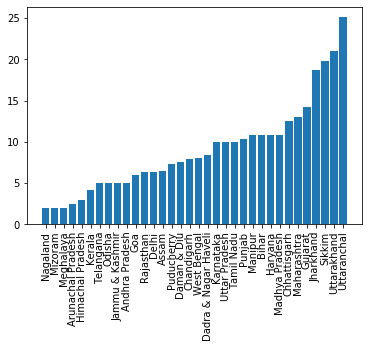

In [10]:
# groupby() method allows us to group our dataframe by unique values in the "state" column
# then we take only the "so2" column from our groupby, 
# and calculate the median value of "so2" for each state
# after this is done, we sort our median of "so2" values in ascending order
# then we assign this into a variable called "so2_med"
so2_med = data.groupby("state")["so2"].median().sort_values(ascending=True)

# printing so2_med gives us a table of median values of so2 for each state
print(so2_med)

# plt.bar() method creates a bar chart for the median so2 values for each state
plt.bar(so2_med.index,so2_med)
# the following code rotates the labels in the x-axis by 90 degrees 
plt.xticks(rotation=90)
# we need plt.show() for the bar chart to show properly
plt.show()

# NOTE: analysis are provided in a markdown cell below the bar chart output

The top 5 states with the highest sulphur dioxide concentration are 
1. Sikkim
2. Uttaranchal
3. Uttarakhand
4. Jharkhand
5. Gujarat

From the bar chart, we can see that the difference in sulphur dioxide concentration for the top 4 states are significant. Each of them differs by roughly 4 μg/m3 from the next rank. Sikkim's sulphur dioxide concentration level is more than twice of the concentration in Gujarat, even though they are only 3 states apart in the ranking. It seems that we have to focus on the top 3 states first when trying to address high sulphur dioxide concentration.

### no2 status

state
Arunachal Pradesh        5.000000
Mizoram                  5.000000
Nagaland                 7.000000
Meghalaya               10.000000
Goa                     11.600000
Puducherry              13.000000
Jammu & Kashmir         13.000000
Himachal Pradesh        13.900000
Kerala                  14.000000
Assam                   14.000000
Odisha                  16.000000
Daman & Diu             17.600000
Chandigarh              18.000000
Dadra & Nagar Haveli    18.000000
Madhya Pradesh          19.200000
Manipur                 19.800000
Andhra Pradesh          20.000000
Tamil Nadu              21.000000
Karnataka               21.200000
Chhattisgarh            21.500000
Telangana               22.000000
Haryana                 22.750000
Gujarat                 23.000000
Uttarakhand             25.809659
Rajasthan               26.000000
Sikkim                  26.800000
Uttar Pradesh           27.000000
Uttaranchal             27.500000
Punjab                  28.300000
Maharash

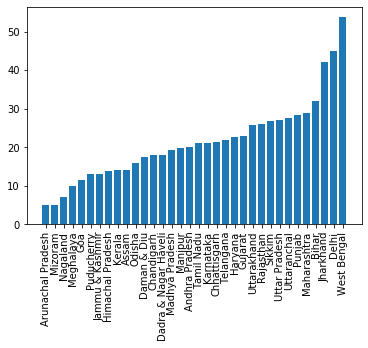

In [11]:
no2_med = data.groupby("state")["no2"].median().sort_values(ascending=True)
print(no2_med)
plt.bar(no2_med.index,no2_med)
plt.xticks(rotation=90)
plt.show()

The top 5 states with the highest nitrogen dioxide concentration are 
1. West Bengal
2. Delhi
3. Jharkhand
4. Bihar
5. Maharashtra

Similar with the ranking of sulphur dioxide concentration, the top 4 states have significantly different nitrogen dioxide concentration (with the exception of Delhi and Jharkand). The difference between West Bengal and Delhi is roughly around 8 μg/m3. Between Jharkand and Bihar is 10 μg/m3. 

Another matter worth noting is that the state with the highest sulphur dioxide concentration has the lowest nitrogen dioxide concentration. On the other hand, Jharkand is in the top 4 in terms of sulphur dioxide and nitrogen dioxide concentration. Maharashtra follows closely by being in the top 6 of both rankings. High concentration of sulphur dioxide and nitrogen dioxide in the air increases the chance of acid rain. To prevent this, addressing the pollution problem would have to start with Jharkand and Maharashtra.

### rspm status

state
Sikkim                   32.000000
Mizoram                  40.000000
Puducherry               46.000000
Kerala                   49.000000
Goa                      56.000000
Meghalaya                57.000000
Tamil Nadu               59.000000
Manipur                  61.000000
Karnataka                63.000000
Arunachal Pradesh        74.500000
Andhra Pradesh           76.000000
Assam                    77.000000
Nagaland                 78.000000
Telangana                80.000000
Odisha                   81.000000
Himachal Pradesh         90.000000
Chandigarh               90.000000
Dadra & Nagar Haveli     91.000000
Gujarat                  95.000000
West Bengal              96.000000
Maharashtra              96.000000
Chhattisgarh            108.833091
Madhya Pradesh          108.833091
Bihar                   108.833091
Daman & Diu             108.833091
Uttaranchal             112.000000
Rajasthan               112.000000
Jammu & Kashmir         116.000000
Uttarakhand   

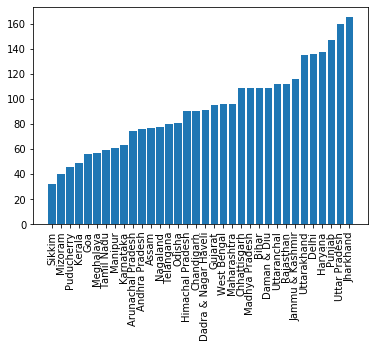

In [12]:
rspm_med = data.groupby("state")["rspm"].median().sort_values(ascending=True)
print(rspm_med)
plt.bar(rspm_med.index,rspm_med)
plt.xticks(rotation=90)
plt.show()

Unlike the case with so2 and no2, it seems that there are relatively fair differences between the top ranks. However, from our bar chart, it seems that there is a significant change every few ranks. For example, there are fair differences between the top ranks until Uttarakhand. At which point, there is a jump in rspm values between Uttarakhand and Jammu & Kashmir. Similar with Chhattisgarh and Maharashtra, Himachal Pradesh and Odisha, Arunachal Pradesh and Karmataka. This might be useful when we want to do classification for rspm concentrations (high, mid-high, mid, mid-low, low).

### spm status

state
Sikkim                   75.00000
Manipur                 120.50000
Puducherry              191.00000
Goa                     199.00000
Daman & Diu             200.50000
Andhra Pradesh          220.78348
Meghalaya               220.78348
Mizoram                 220.78348
Nagaland                220.78348
Odisha                  220.78348
Punjab                  220.78348
Tamil Nadu              220.78348
Telangana               220.78348
Uttar Pradesh           220.78348
Uttarakhand             220.78348
Rajasthan               220.78348
Maharashtra             220.78348
Kerala                  220.78348
Karnataka               220.78348
Jharkhand               220.78348
Jammu & Kashmir         220.78348
Himachal Pradesh        220.78348
Haryana                 220.78348
Gujarat                 220.78348
Dadra & Nagar Haveli    220.78348
Chhattisgarh            220.78348
Chandigarh              220.78348
Bihar                   220.78348
Assam                   220.78348
Arunacha

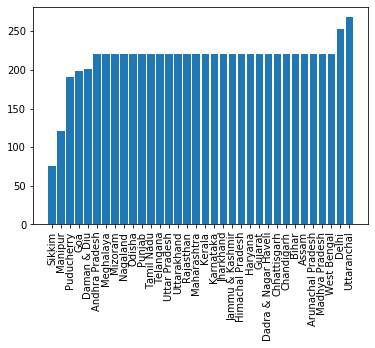

In [13]:
spm_med = data.groupby("state")["spm"].median().sort_values(ascending=True)
print(spm_med)
plt.bar(spm_med.index,spm_med)
plt.xticks(rotation=90)
plt.show()

From our bar chart, we can see that it is almost shaped like a box, which means that most of the states have the same median value for spm. Recall that earlier, we have replaced N/A values in the spm column with the median of the existing spm values. So it is most likely that there are too many states with no spm values such that they are all replaced by the median. This makes our spm data less accurate compared to other columns, because if this is the case, the median value were only based on too little percentage of the whole data.

### What is the yearly trend in a particular state, say ‘Andhra Pradesh’?

Create a new dataframe containing the NO2, SO2, rspm, and spm data regarding state ‘Andhra Pradesh’ only and group it by ‘year’. Display top 5 records after.

In [14]:
# we first, subset the dataframe so that it would only include data for Andhra Pradesh
# next, we groupby our sliced dataframe by year
# then we select columns of importance, which are so2, no2, rspm and spm
# finally, we calculate the median for each year by calling the method, median()
newdf = data[data["state"]=="Andhra Pradesh"].groupby("year")[["so2","no2","rspm","spm"]].median()

# display the dataframe
newdf

,so2,no2,rspm,spm
year,,,,
1990,5.60,13.60,108.833091,179.00000
1991,8.25,12.80,108.833091,141.50000
1992,12.40,27.60,108.833091,192.00000
1993,6.00,11.40,108.833091,220.78348
1994,8.70,14.20,108.833091,220.78348
1995,14.10,26.30,108.833091,147.00000
1996,18.85,30.15,108.833091,181.50000
1997,16.40,28.40,108.833091,145.00000
1998,10.15,20.25,108.833091,152.00000


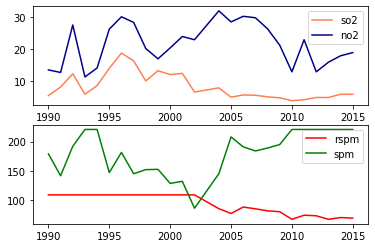

In [15]:
# Display yearly trend graph (year vs. value) in pairs: (a) so2 and no2 (b) rspm and spm. 
# So, you will display TWO graphs altogether.

# the method subplot(2,1,1) creates a 2x1 subplot and activates the first (top) subplot
plt.subplot(2,1,1)
plt.plot(newdf[["so2"]],label="so2",c="coral")
plt.plot(newdf[["no2"]],label="no2",c="darkblue")
# create legend for easy readability
plt.legend()

# the method subplot(2,1,2) activates the second (bottom) subplot
plt.subplot(2,1,2)
plt.plot(newdf[["rspm"]],label="rspm",c="red")
plt.plot(newdf[["spm"]],label="spm",c="green")
plt.legend()
plt.show()

Do you find anything alarming? Explain what you can conclude from this Exploratory Data Analysis for the State of Andhra Pradesh. Enter your answer here .....



From the plots, it seems that so2 and rspm values are low compared to the previous years. However, so2 values seems to be rising slightly. 

We can also see that no2 values seems to be on the rise and might become alarming in the future.

As for spm values, we have to note that the stable spm values from 2010-2015 might have been caused by N/A values (that were replaced by the median). So the spm values from 2010-2015 might not be accurate for us to base our conclusions on. But data from prior to 2010 indicates that spm values are rising in Andhra Pradesh. 

Therefore, we have to try to collect the most recent data for spm values in Andhra Pradesh if possible. Although it seems that at this point, attempts to decrease no2 and spm values might be the most helpful action to take to decrease pollution rate in Andhra Pradesh. 